<a href="https://colab.research.google.com/github/apriilbee/SIT720/blob/main/Microclimate_Sensors_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Solving: Microclimate Sensors Data

In [ ]:
import pandas as pd
from google.colab import files

#Uncomment the lines below to upload a file manually in Colab
#uploaded = files.upload()
#filename = next(iter(uploaded))

df = pd.read_csv("microclimate-sensors-data.csv")

df.head()

,Device_id,Time,SensorLocation,LatLong,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
0,ICTMicroclimate-08,2025-06-08T11:01:12+10:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,201.0,354.0,0.0,0.8,2.0,10.3,87.600000,1001.100000,2.0,5.0,73.400000
1,ICTMicroclimate-02,2025-06-08T11:01:45+10:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",0.0,337.0,341.0,0.0,0.4,0.9,9.9,96.400000,996.000000,7.0,9.0,69.200000
2,ICTMicroclimate-01,2025-06-08T11:06:09+10:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,15.0,NaN,NaN,0.2,NaN,9.0,95.800003,999.900024,1.0,4.0,52.799999
3,ICTMicroclimate-06,2025-06-08T11:14:42+10:00,Tram Stop 7B - Melbourne Tennis Centre Precinc...,"-37.8194993, 144.9787211",0.0,85.0,359.0,0.0,0.7,5.0,10.4,88.700000,1000.700000,1.0,2.0,72.200000
4,ICTMicroclimate-10,2025-06-08T11:15:15+10:00,1 Treasury Place,"-37.8128595, 144.9745395",0.0,57.0,356.0,0.0,0.3,0.6,9.3,98.800000,997.200000,1.0,3.0,82.100000


## 1. Feature Names with Number of Missing Entries

In [ ]:
count_missing_data = df.isnull().sum()

print("Feature names with number of missing entries:\n")
for feature, count in count_missing_data.items():
  print(f"{feature}: {count}")

Feature names with number of missing entries:

Device_id: 0
Time: 0
SensorLocation: 6143
LatLong: 11483
MinimumWindDirection: 39867
AverageWindDirection: 504
MaximumWindDirection: 40025
MinimumWindSpeed: 40025
AverageWindSpeed: 504
GustWindSpeed: 40025
AirTemperature: 504
RelativeHumidity: 504
AtmosphericPressure: 504
PM25: 18973
PM10: 18973
Noise: 18973


#2. Filling in Missing Entries with Mean/Median Value

To determine whether to use mean or median imputation for missing values, it's important to first analyze the distribution of the data. Missing values are typically filled using a measure of **central tendency** to preserve the structure of the dataset.

For normally distributed data, typically we use the mean since it represents the center.
While for skewed data, the median is more appropriate as it is less sensitive to outliers and reflects the central value.


---



*Reference: Hartwig, F. P., Davey Smith, G., Schmidt, A. F., Sterne, J. A. C.,
Higgins, J. P. T., & Bowden, J. (2020). The median and the mode as
robust meta-analysis estimators in the presence of small-study effects
and outliers. Research Synthesis Methods, 11(3), 397-412.
https://doi.org/10.1002/jrsm.1402*


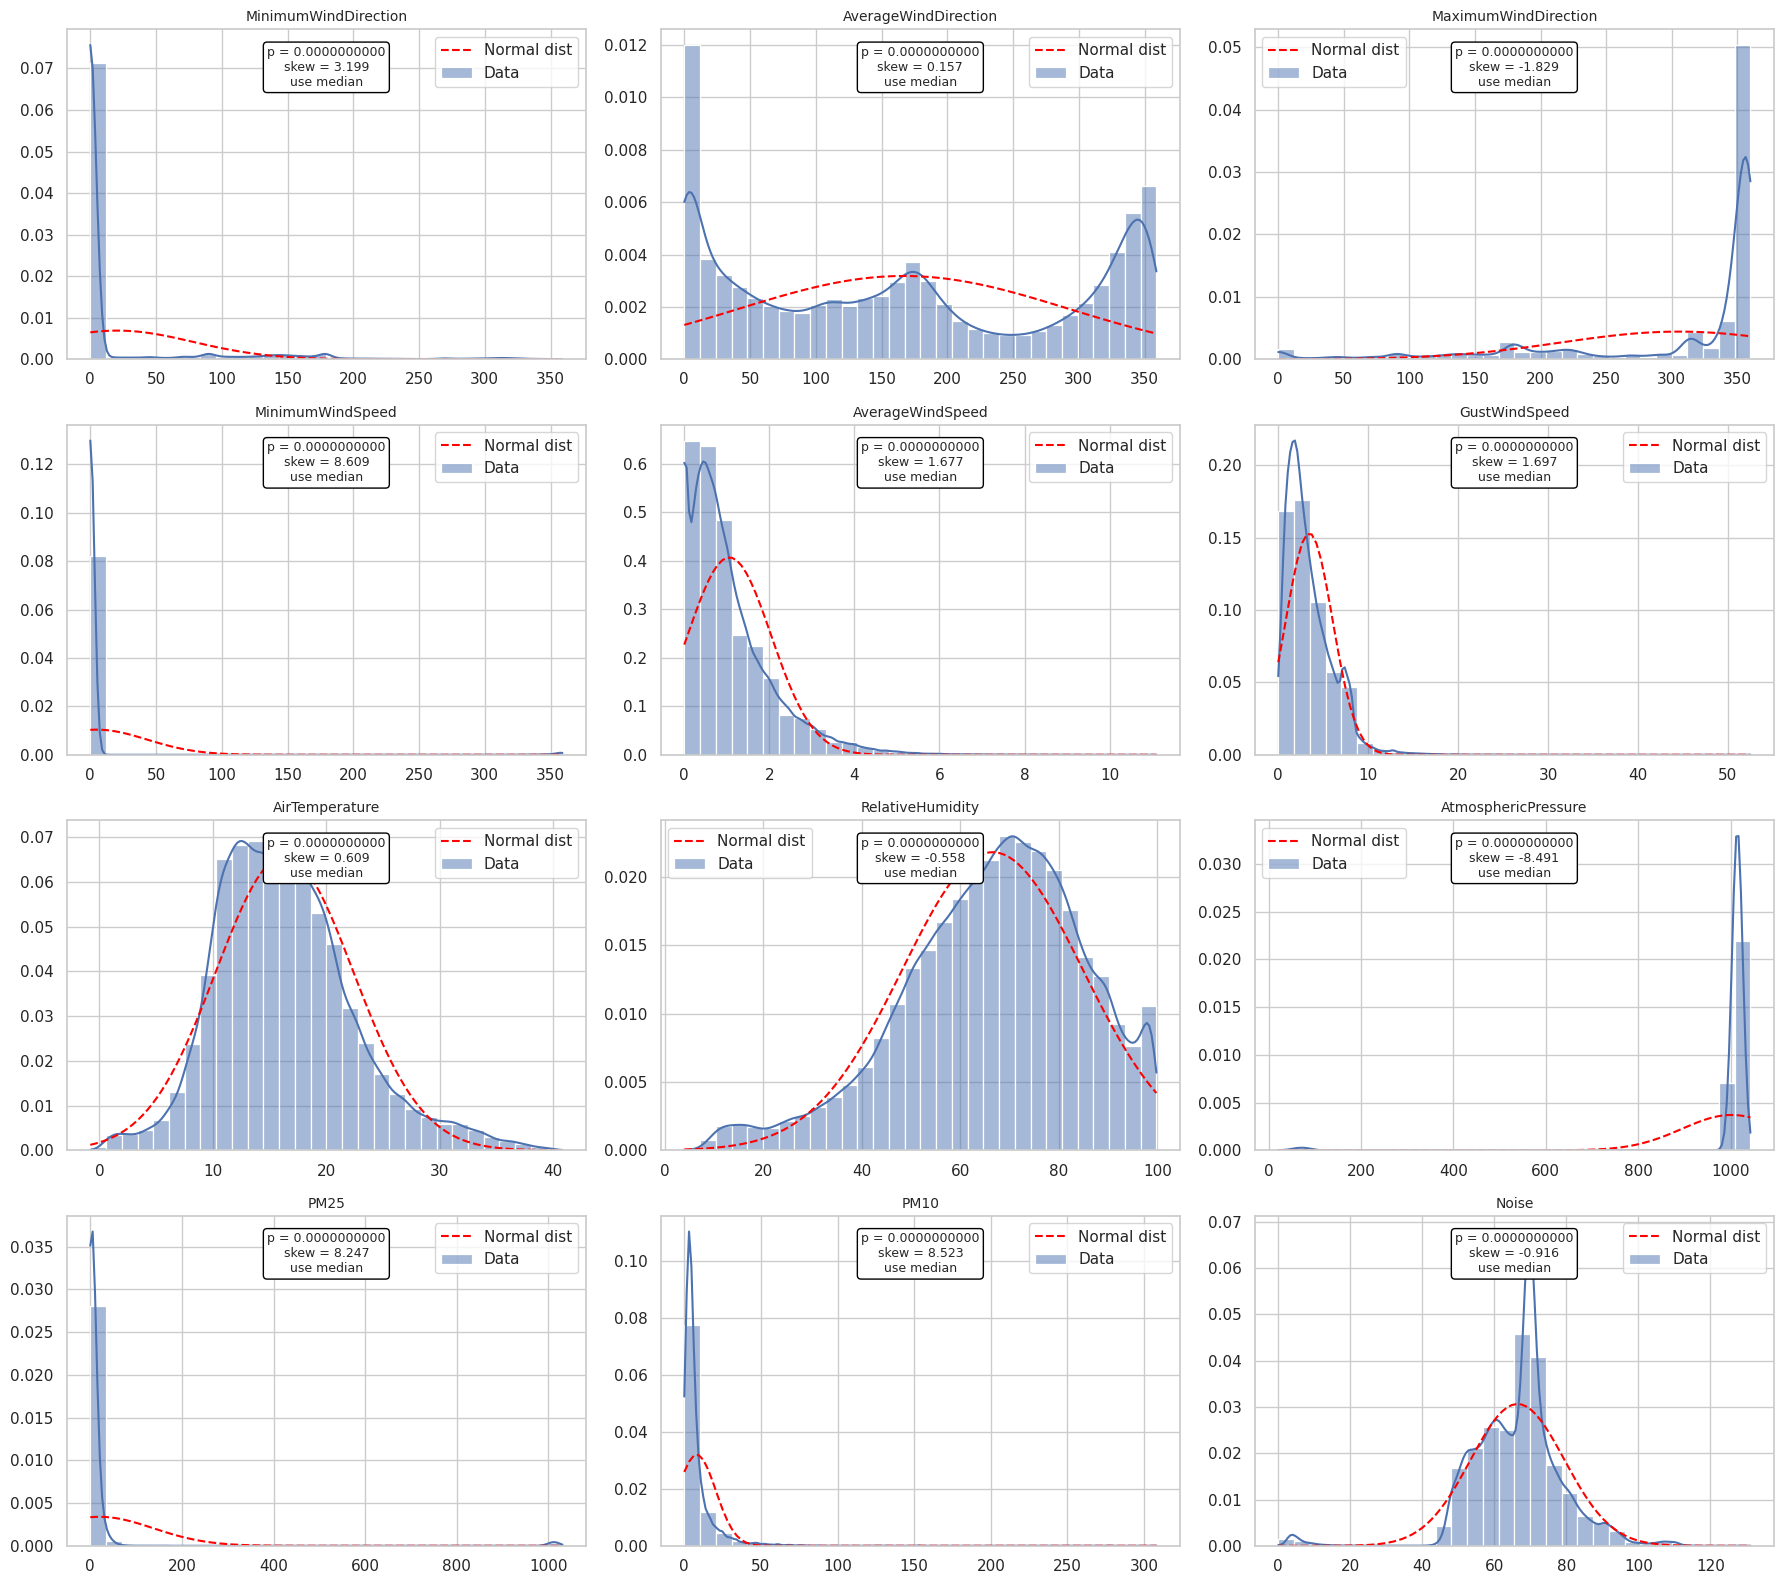

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

numeric_cols = df.select_dtypes(include=['number']).columns

cols_per_row = 3
num_cols = len(numeric_cols)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

normality_results = {}

plt.figure(figsize=(6 * cols_per_row, 4 * num_rows))

for i, col in enumerate(numeric_cols):
    clean_col = df[col].dropna()
    mean = clean_col.mean()
    std = clean_col.std()

    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(clean_col, kde=True, bins=30, stat='density', label='Data')

    x = np.linspace(clean_col.min(), clean_col.max(), 100)
    y = stats.norm.pdf(x, mean, std)
    plt.plot(x, y, color='red', linestyle='--', label='Normal dist')

    p_value = stats.normaltest(clean_col).pvalue
    decision = "use mean" if p_value > 0.05 else "use median"

    normality_results[col] = {
        'p_value': p_value,
        'skewness': clean_col.skew(),
        'decision': decision
    }

    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.text(
        0.5, 0.95,
        f'p = {p_value:.10f}\nskew = {clean_col.skew():.3f}\n{decision}',
        transform=plt.gca().transAxes,
        ha='center',
        va='top',
        fontsize=9,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

plt.tight_layout()
plt.show()


The histograms above show the distribution of the numeric features from the dataset, overlaid with a red dashed line representing a Gaussian (normal) distribution for comparison. For each variable, we assessed normality using skewness test.

All features displayed skewness and deviated from normal distribution, indicating that **median imputation is the appropriate method for handling misisng values across all variables**.

In [ ]:
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Filled missing values in '{col}' with median: {median_val}")

Filled missing values in 'MinimumWindDirection' with median: 0.0
Filled missing values in 'AverageWindDirection' with median: 159.0
Filled missing values in 'MaximumWindDirection' with median: 353.0
Filled missing values in 'MinimumWindSpeed' with median: 0.0
Filled missing values in 'AverageWindSpeed' with median: 0.8
Filled missing values in 'GustWindSpeed' with median: 2.8
Filled missing values in 'AirTemperature' with median: 15.8
Filled missing values in 'RelativeHumidity' with median: 68.3
Filled missing values in 'AtmosphericPressure' with median: 1014.599976
Filled missing values in 'PM25' with median: 3.0
Filled missing values in 'PM10' with median: 5.0
Filled missing values in 'Noise' with median: 68.3


#3. Histogram for PM25 and PM10

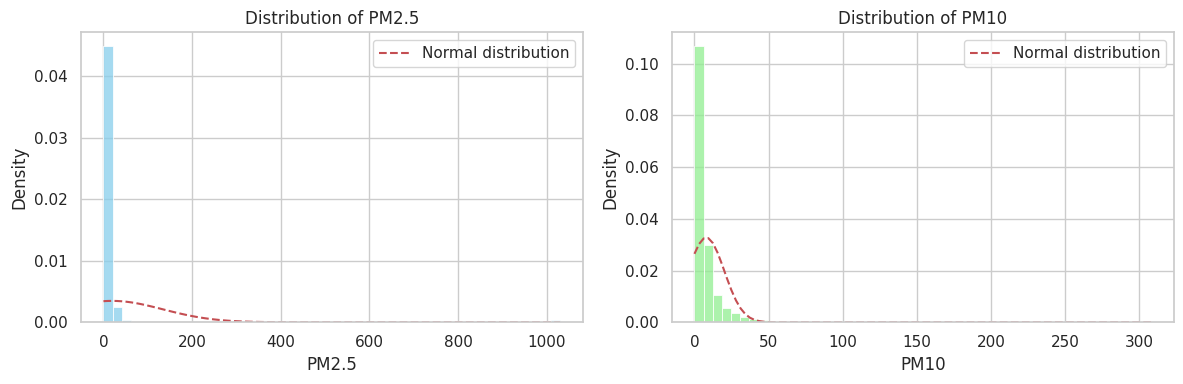

Pearson correlation:

          PM25      PM10
PM25  1.000000  0.049445
PM10  0.049445  1.000000

Spearman correlation:

          PM25      PM10
PM25  1.000000  0.851102
PM10  0.851102  1.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PM2.5
pm25_data = df['PM25'].dropna()
sns.histplot(pm25_data, bins=50, kde=False, stat='density', ax=axes[0], color='skyblue')
mean_pm25, std_pm25 = pm25_data.mean(), pm25_data.std()
x_pm25 = np.linspace(pm25_data.min(), pm25_data.max(), 100)
axes[0].plot(x_pm25, norm.pdf(x_pm25, mean_pm25, std_pm25), 'r--', label='Normal distribution')
axes[0].set_title("Distribution of PM2.5")
axes[0].set_xlabel("PM2.5")
axes[0].set_ylabel("Density")
axes[0].legend()

# PM10
pm10_data = df['PM10'].dropna()
sns.histplot(pm10_data, bins=50, kde=False, stat='density', ax=axes[1], color='lightgreen')
mean_pm10, std_pm10 = pm10_data.mean(), pm10_data.std()
x_pm10 = np.linspace(pm10_data.min(), pm10_data.max(), 100)
axes[1].plot(x_pm10, norm.pdf(x_pm10, mean_pm10, std_pm10), 'r--', label='Normal distribution')
axes[1].set_title("Distribution of PM10")
axes[1].set_xlabel("PM10")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()

# Correlations
print("Pearson correlation:\n")
correlation = df[['PM25', 'PM10']].corr(method='pearson')
print(correlation)

print("\nSpearman correlation:\n")
spearman_corr = df[['PM25', 'PM10']].corr(method='spearman')
print(spearman_corr)


The histograms show that both PM2.5 and PM10 are **heavily right-skewed**, with most values clustered at the low end and a few extreme outliers causing long tails. The overlaid normal curves highlight how far the actual data deviates from a normal distribution.

Correlation analysis shows a weak Pearson coefficient (0.049), indicating little to no linear relationship. However, the Spearman coefficient is strong (0.851), revealing a clear monotonic relationship which means that when PM2.5 increases, PM10 tends to increase as well, even if not linearly.

#4. Split LatLong

In [ ]:
df['LatLong'] = df['LatLong'].astype(str)

# Split into Latitude and Longitude
df[['Latitude', 'Longitude']] = df['LatLong'].str.split(',', expand=True).astype(float)

# Display encoded values
df[['LatLong', 'Latitude', 'Longitude']].head()


,LatLong,Latitude,Longitude
0,"-37.8184515, 144.9678474",-37.818452,144.967847
1,"-37.814604, 144.9702991",-37.814604,144.970299
2,"-37.8185931, 144.9716404",-37.818593,144.971640
3,"-37.8194993, 144.9787211",-37.819499,144.978721
4,"-37.8128595, 144.9745395",-37.812860,144.974539


To split the `LatLong` variable, we used a comma delimiter to extract `Latitude` and `Longitude`. These values are in **decimal degrees (DD) format**, which is standard for representing geographic coordinates. In a GIS, decimal degrees are more efficient because they make digital storage of coordinates easier and computations faster. Since latitude and longitude are both continuous variables—not categorical—label encoding would be inappropriate. Therefore, we retain them as separate numeric features to preserve their geospatial meaning and enable accurate spatial analysis.


---
*Reference: https://geoscience.blog/what-are-the-advantages-disadvantages-of-reporting-location-in-decimal-degrees-versus-degree-min-sec/?utm_source=chatgpt.com*


#5. Min-Max Scaling for Continuous Values

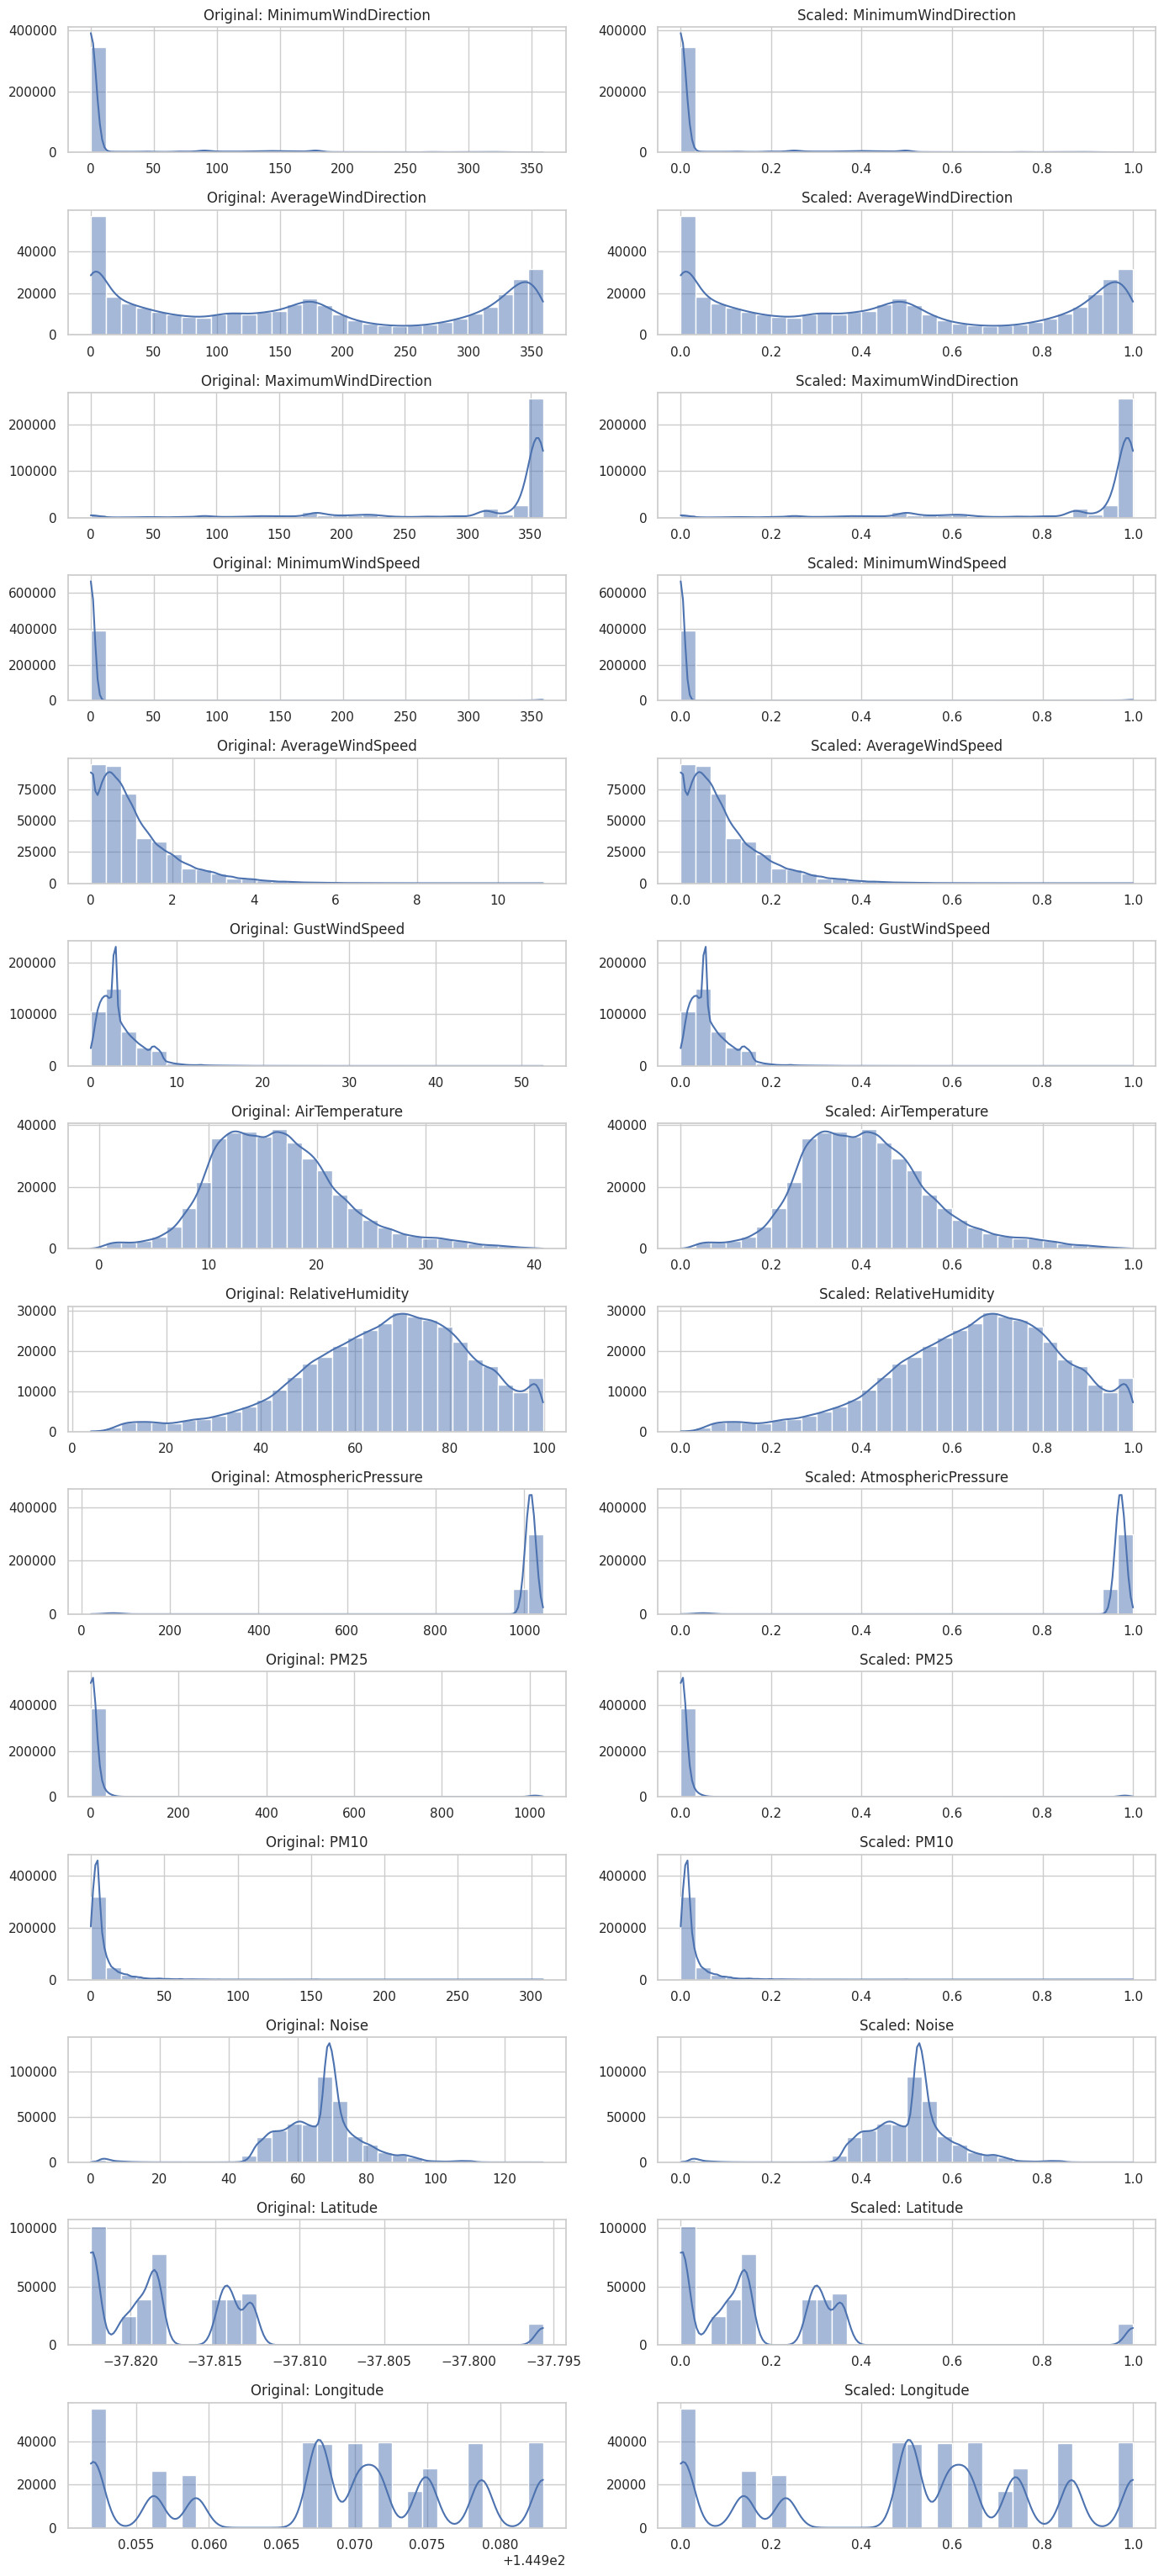

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# List down continuous variables (including Latitude and Longitude)
continuous_cols = [
    'MinimumWindDirection', 'AverageWindDirection', 'MaximumWindDirection',
    'MinimumWindSpeed', 'AverageWindSpeed', 'GustWindSpeed',
    'AirTemperature', 'RelativeHumidity', 'AtmosphericPressure',
    'PM25', 'PM10', 'Noise', 'Latitude', 'Longitude'
]

df_clean = df[continuous_cols]

# Apply Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(scaled_data, columns=continuous_cols)

# Plot side-by-side (original vs. scaled) per feature
num_features = len(continuous_cols)
plt.figure(figsize=(14, num_features * 2.2))

for i, col in enumerate(continuous_cols):
    # Original
    plt.subplot(num_features, 2, 2*i + 1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Original: {col}')
    plt.xlabel('')
    plt.ylabel('')

    # Scaled
    plt.subplot(num_features, 2, 2*i + 2)
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f'Scaled: {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


Min-max scaling was applied to all continuous features to rescale their values into the `[0,1]` range. As seen on the graphs, this transformation still preserves the original distribution shape even though the feature magnitudes are compressed to a common scale. This means that scaling doesn't normalize or correct skewness, it only adjusts the value range.



---

#**Acknowledgement**

I acknowledge the use of OpenAI's ChatGPT 4o to assist with syntax corrections, code structuring, and language refinement throughout this report. All data analysis, interpretations, and conclusions are my own and have been completed in accordance with academic integrity standards. Analytical approaches and justifications were supported by course readings and relevant scholarly literature to ensure methodological soundness.
